# 4. 
##    4.1) “images/sharks.png” görüntüsünü açıp ikili bir görüntü elde ediniz. 
##    4.2)  Görüntü üzerinde daire şeklinde bir yapısal eleman kullanarak açma (opening) işlemi gerçekleştiriniz. 
##    4.3) Ardından görüntü üzerinde bağlı bileşen etiketleme algoritmasını çalıştırıp her bir etiketin farklı bir renkte gösterildiği etiket görüntüsünü oluşturunuz.
##    4.4) Algoritma neticesinde görüntüde kaç adet köpek balığı sayıldığını belirtiniz.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import img_read, show_hist

##    4.1) “images/sharks.png” görüntüsünü açıp ikili bir görüntü elde ediniz. 

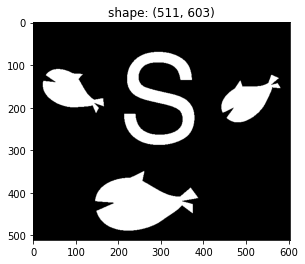

array([  0, 255], dtype=uint8)

In [7]:
img = img_read('../images/sharks.png', ret_gray=True)
np.unique(img)

##    4.2)  Görüntü üzerinde daire şeklinde bir yapısal eleman kullanarak açma (opening) işlemi gerçekleştiriniz. 


In [16]:
def circular_opening_morph(img, kernel_size=3, iterations=1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=iterations)

Text(0.5, 1.0, 'Circular opening morph')

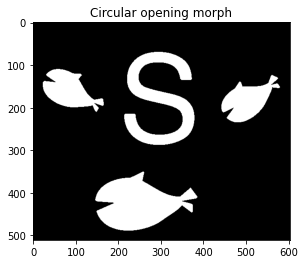

In [20]:
img_open = circular_opening_morph(img, kernel_size=3, iterations=2)
plt.imshow(img_open, cmap='gray')
plt.title('Circular opening morph')

##    4.3) Ardından görüntü üzerinde bağlı bileşen etiketleme algoritmasını çalıştırıp her bir etiketin farklı bir renkte gösterildiği etiket görüntüsünü oluşturunuz.


Number of objects: 4
unique: [0 1 2 3 4]


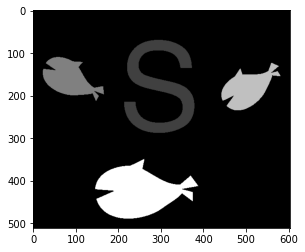

In [63]:
import scipy.ndimage.measurements as measurements

#Connected component labeling

def connected_components(img, connectivity=8):
    """
    Connected component labeling.
    Parameters:
    -----------
    img: 2d array
        Binary image.
    connectivity: int
        Connectivity of the graph.
    Returns:
    --------
    labels: 2d array
        Labels of the connected components.
    nbr_objects: int
        Number of objects.
    """
    labels, nbr_objects = measurements.label(img)
    print ("Number of objects:", nbr_objects)
    plt.imshow(labels, cmap='gray')
    print("unique:", np.unique(labels))
    return labels, nbr_objects

connected_components = connected_components(img)

##    4.4) Algoritma neticesinde görüntüde kaç adet köpek balığı sayıldığını belirtiniz.

In [41]:
output = cv2.connectedComponentsWithStats(img, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

[INFO] examining component 2/5
area:  14899
width:165, height:218
[INFO] examining component 3/5
area:  7746
width:144, height:103
[INFO] keeping connected component '2'
[INFO] examining component 4/5
area:  7728
width:139, height:111
[INFO] keeping connected component '3'
[INFO] examining component 5/5
area:  18814
width:242, height:140
[INFO] keeping connected component '4'


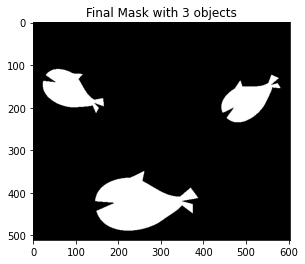

In [61]:
# initialize an output mask to store all characters parsed from
# the license plate
mask = np.zeros(img.shape, dtype="uint8")
object_count = 0

# loop over the number of unique connected component labels
# skip id=0 as it is background
for i in range(1, numLabels):
    # if this is the first component then we examine the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    
    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]
    print("area: ",area)
    print(f"width:{w}, height:{h}")
    
    
    # clone our original image (so we can draw on it) and then draw
    # a bounding box surrounding the connected component along with
    # a circle corresponding to the centroid
    output = img.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 10, (0, 0, 255), -1)
    
    
    # ensure the width, height, and area are all neither too small
    # nor too big
    keepWidth = w > 5 # and w < 50
    keepHeight = h < 150 # and h > 0
    keepArea = area > 500 # and area < 1500
    # ensure the connected component we are examining passes all
    # three tests
    if all((keepWidth, keepHeight, keepArea)):
        # construct a mask for the current connected component and
        # then take the bitwise OR with the mask
        print("[INFO] keeping connected component '{}'".format(i))
        componentMask = (labels == i).astype("uint8") * 255
        mask = cv2.bitwise_or(mask, componentMask)
        object_count += 1 
    """
    # show our output image and connected component mask
    plt.imshow(output, cmap='gray')
    plt.title("Output")
    plt.show()

    plt.imshow(componentMask, cmap='gray')
    plt.title("Connected Component")
    plt.show()
    """

plt.imshow(mask, cmap='gray')
plt.title(f"Final Mask with {object_count} objects")
plt.show()